**Libraries Import**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

**Task 1: Data Understanding and Preprocessing**

In [ ]:
df = pd.read_csv('fraud_detection_data.csv')
df.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant,Location,Transaction Type,Card Type,Is Fraudulent
0,90023589-2ef8-43e7-807a-b4ab92fcc2a4,5d7358c2-ede9-488a-96e4-fa78a9d9d6db,2024-03-05 15:53:49,231.55,Torres-Sanchez,West Adam,Online Purchase,MasterCard,Yes
1,3eb2e762-9525-4c33-a022-a47e3da3ec5d,0aac2ab4-f920-428a-939a-78ff9858c13d,2024-07-04 01:00:25,1485.69,"Brandt, Ross and Butler",New Benjaminbury,In-Store Purchase,Discover,Yes
2,12d58e99-92d7-46f3-8ac0-e01ac86c15ec,4d6ee059-5df1-4323-8484-2f04aae3d6b3,2024-01-14 00:18:53,497.33,Delgado LLC,Lake Jamieberg,ATM Withdrawal,Amex,Yes
3,e9cac917-d336-4629-9baa-f8c19691cb80,d7709d08-fa3c-419c-b2fb-bc9ef2997ef9,2023-12-09 03:06:54,287.68,"Smith, Mcdonald and Cruz",Lake James,In-Store Purchase,Visa,Yes
4,acb39efa-d3c7-4bae-9b6c-9cda5ed79503,e505e3e6-7982-4c7f-b0b1-26a0b6d59d31,2024-02-17 03:22:55,213.97,Huff Ltd,Lake Anthony,In-Store Purchase,Discover,No


In [ ]:
# Check for missing values
print(df.isnull().sum())

Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Merchant              0
Location              0
Transaction Type      0
Card Type             0
Is Fraudulent         0
dtype: int64


In [ ]:
# Categorical variables handling using LabelEncoder
categorical_columns = ['Merchant', 'Location', 'Transaction Type', 'Card Type']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
# 'Is Fraudulent' convertion to binary (Yes -> 1, No -> 0)
df['Is Fraudulent'] = df['Is Fraudulent'].map({'Yes': 1, 'No': 0})

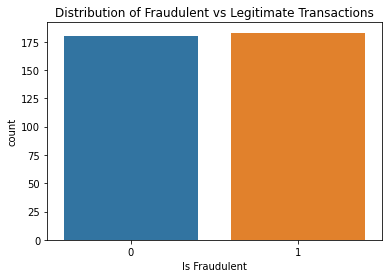

In [ ]:
# Countplot for Fraudulent vs Legitimate Transactions
sns.countplot(x='Is Fraudulent', data=df)
plt.title('Distribution of Fraudulent vs Legitimate Transactions')
plt.show()

**Task 2: Feature Engineering**


In [ ]:
df['Transaction Hour'] = pd.to_datetime(df['Transaction Date']).dt.hour
df['Transaction Frequency'] = df.groupby('Customer ID')['Transaction ID'].transform('count')
scaler = StandardScaler()
df[['Transaction Amount', 'Transaction Frequency']] = scaler.fit_transform(df[['Transaction Amount', 'Transaction Frequency']])

In [ ]:
df[['Transaction Amount', 'Transaction Frequency']].head()

,Transaction Amount,Transaction Frequency
0,-1.284566,0.0
1,0.875565,0.0
2,-0.826787,0.0
3,-1.187888,0.0
4,-1.314846,0.0


**Task 3: Data Splitting**


In [ ]:
# Split the data into features (X) and target (y)
X = df.drop(['Transaction ID', 'Customer ID', 'Is Fraudulent', 'Transaction Date'], axis=1)
y = df['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Task 4: Model Building**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Task 5: Model Training**


In [2]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 54.13%


**Task 6: Model Evaluation**

Accuracy: 54.13%


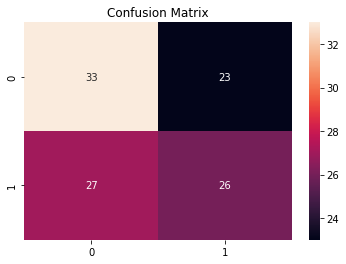

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        56
           1       0.53      0.49      0.51        53

    accuracy                           0.54       109
   macro avg       0.54      0.54      0.54       109
weighted avg       0.54      0.54      0.54       109



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))